In [1]:
#As a fresher i tried my best to solve the problem if someone is having new way of solving that problem than let me
#know any commits would be appreciated
import pandas as pd 
import numpy as np

In [2]:
data=pd.read_csv('/home/aman/Desktop/jupyterfiles/titanic.csv')
data1=pd.read_csv('/home/aman/Desktop/jupyterfiles/titanictest.csv')



In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S


In [4]:
data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32,0,0,370376,7.75,NaN,Q


In [12]:
data.shape

(891, 12)

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 90.5+ KB


In [16]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()


    

/usr/lib/python3/dist-packages/matplotlib/__init__.py:874: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [4]:
def bar_chart(feature):
    survived=data[data['Survived']==1][feature].value_counts()
    dead=data[data['Survived']==0][feature].value_counts()
    df=pd.DataFrame([survived,dead])
    df.index=['Survived','Dead']
    df.plot(kind='bar',stacked=True,figsize=(10,5))

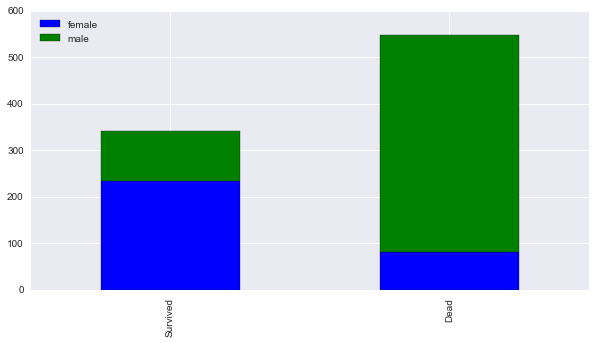

In [7]:
bar_chart('Sex')

#here we can say female survived more than male

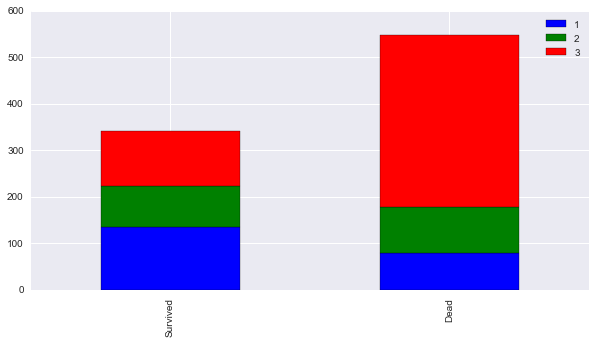

In [8]:
bar_chart('Pclass')
#here we can see that person with 1 class ticket survived more

In [5]:
train_test_set=[data,data1]
for dataset in train_test_set:
    #print(dataset)
    dataset['Title']=dataset['Name'].str.extract(' ([A-Za-z]+)\.')
    

In [6]:
data1.head(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,Mr
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,Mrs
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,Mr
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,Mr
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,Mrs
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S,Mr
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q,Miss
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S,Mr
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C,Mrs
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S,Mr


In [7]:
data['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Major         2
Mlle          2
Col           2
Lady          1
Ms            1
Don           1
Capt          1
Mme           1
Jonkheer      1
Countess      1
Sir           1
Name: Title, dtype: int64

In [8]:
title_mapping={"Mr":0,"Miss":1,"Mrs":2,"Master":3,"Dr":3,"Rev":3,"Major":3,"Mlle":3,"Col":3,"Ms":3,"Don":3,
               "Lady":3,"Sir":3,"Countess":3,"Capt":3,"Mme":3,"Jonkheer":3,"Dona":3
               }
for dataset in train_test_set:
    dataset['Title']=dataset['Title'].map(title_mapping)

In [9]:
data.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S,0


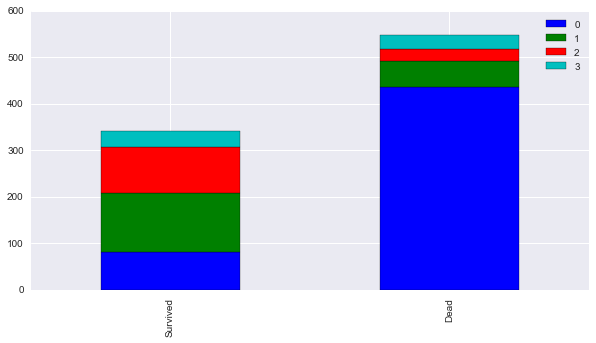

In [10]:
bar_chart('Title')
#here we can see that mr is having high chance to die

In [11]:
data.drop('Name',axis=1,inplace=True)
#data1.drop('Name',axis=1,inplace=True)

In [12]:
data1.drop('Name',axis=1,inplace=True)


In [13]:
data1.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,female,47.0,1,0,363272,7.0000,NaN,S,2
2,894,2,male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,female,22.0,1,1,3101298,12.2875,NaN,S,2


In [13]:
sex_mapping={"male":0,"female":1}
for dataset in train_test_set:
    dataset['Sex']=dataset['Sex'].map(sex_mapping)

In [14]:
data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,22,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,1,38,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,1,26,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,1,35,1,0,113803,53.1000,C123,S,2
4,5,0,3,0,35,0,0,373450,8.0500,NaN,S,0


In [14]:
data["Age"].fillna(data.groupby("Title")["Age"].transform("median"),inplace=True)

In [15]:
data1["Age"].fillna(data.groupby("Title")["Age"].transform("median"),inplace=True)

In [16]:
data.head(20)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,22,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,1,38,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,1,26,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,1,35,1,0,113803,53.1000,C123,S,2
4,5,0,3,0,35,0,0,373450,8.0500,NaN,S,0
5,6,0,3,0,30,0,0,330877,8.4583,NaN,Q,0
6,7,0,1,0,54,0,0,17463,51.8625,E46,S,0
7,8,0,3,0,2,3,1,349909,21.0750,NaN,S,3
8,9,1,3,1,27,0,2,347742,11.1333,NaN,S,2
9,10,1,2,1,14,1,0,237736,30.0708,NaN,C,2


In [17]:
for dataset in train_test_set:
    dataset.loc[ dataset['Age']<=16,'Age']=0,
    dataset.loc[(dataset['Age']>16) & (dataset['Age']<=26),'Age']=1,
    dataset.loc[(dataset['Age']>26) & (dataset['Age']<=36),'Age']=2,
    dataset.loc[(dataset['Age']>36) & (dataset['Age']<=62),'Age']=3,
    dataset.loc[dataset['Age']>62,'Age'] =4

In [18]:
data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,1,3,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,1,1,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,1,2,1,0,113803,53.1000,C123,S,2
4,5,0,3,0,2,0,0,373450,8.0500,NaN,S,0


In [21]:
data['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [19]:
for dataset in train_test_set:
    dataset['Embarked']=dataset['Embarked'].fillna('S')

In [20]:
embarked_mapping={"S":0,"C":1,"Q":2}
for dataset in train_test_set:
    dataset['Embarked']=dataset['Embarked'].map(embarked_mapping)

In [21]:
data["Fare"].fillna(data.groupby("Pclass")["Fare"].transform("median"),inplace=True)

In [22]:
data1["Fare"].fillna(data.groupby("Pclass")["Fare"].transform("median"),inplace=True)

In [23]:
for dataset in train_test_set:
    dataset.loc[ dataset['Fare']<=17,'Fare']=0,
    dataset.loc[(dataset['Fare']>17) & (dataset['Fare']<=30),'Fare']=1,
    dataset.loc[(dataset['Fare']>30) & (dataset['Fare']<=100),'Fare']=2,
    dataset.loc[dataset['Fare']>100,'Fare']=3

In [24]:
data.head(10)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1,1,0,A/5 21171,0,NaN,0,0
1,2,1,1,1,3,1,0,PC 17599,2,C85,1,2
2,3,1,3,1,1,0,0,STON/O2. 3101282,0,NaN,0,1
3,4,1,1,1,2,1,0,113803,2,C123,0,2
4,5,0,3,0,2,0,0,373450,0,NaN,0,0
5,6,0,3,0,2,0,0,330877,0,NaN,2,0
6,7,0,1,0,3,0,0,17463,2,E46,0,0
7,8,0,3,0,0,3,1,349909,1,NaN,0,3
8,9,1,3,1,2,0,2,347742,0,NaN,0,2
9,10,1,2,1,0,1,0,237736,2,NaN,1,2


In [37]:
data.Cabin.value_counts()

C    59
B    47
D    33
E    32
A    15
F    13
G     4
T     1
Name: Cabin, dtype: int64

In [25]:
for dataset in train_test_set:
    dataset['Cabin']=dataset['Cabin'].str[:1]

In [26]:
data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1,1,0,A/5 21171,0,NaN,0,0
1,2,1,1,1,3,1,0,PC 17599,2,C,1,2
2,3,1,3,1,1,0,0,STON/O2. 3101282,0,NaN,0,1
3,4,1,1,1,2,1,0,113803,2,C,0,2
4,5,0,3,0,2,0,0,373450,0,NaN,0,0


In [27]:
cabin_mapping={"A":0,"B":0.4,"C":0.8,"D":1.2,"E":1.6,"F":2.0,"G":2.4,"T":2.8}
for dataset in train_test_set:
    dataset['Cabin']=dataset['Cabin'].map(cabin_mapping)

In [28]:
data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1,1,0,A/5 21171,0,NaN,0,0
1,2,1,1,1,3,1,0,PC 17599,2,0.8,1,2
2,3,1,3,1,1,0,0,STON/O2. 3101282,0,NaN,0,1
3,4,1,1,1,2,1,0,113803,2,0.8,0,2
4,5,0,3,0,2,0,0,373450,0,NaN,0,0


In [29]:
data["Cabin"].fillna(data.groupby("Pclass")["Cabin"].transform("median"),inplace=True)

In [30]:
data1["Cabin"].fillna(data.groupby("Pclass")["Cabin"].transform("median"),inplace=True)

In [31]:
data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1,1,0,A/5 21171,0,2.0,0,0
1,2,1,1,1,3,1,0,PC 17599,2,0.8,1,2
2,3,1,3,1,1,0,0,STON/O2. 3101282,0,2.0,0,1
3,4,1,1,1,2,1,0,113803,2,0.8,0,2
4,5,0,3,0,2,0,0,373450,0,2.0,0,0


In [32]:
data["FamilySize"]=data["SibSp"]+data["Parch"]+1
data1["FamilySize"]=data["SibSp"]+data["Parch"]+1


In [33]:
data.FamilySize.value_counts()

1     537
2     161
3     102
4      29
6      22
5      15
7      12
11      7
8       6
Name: FamilySize, dtype: int64

In [34]:
family_mapping={1:0,2:0.4,3:0.8,4:1.2,5:1.6,6:2.0,7:2.4,8:2.8,9:3.2,10:3.6,11:4.0}
for dataset in train_test_set:
    dataset['FamilySize']=dataset['FamilySize'].map(family_mapping)

In [35]:
data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilySize
0,1,0,3,0,1,1,0,A/5 21171,0,2.0,0,0,0.4
1,2,1,1,1,3,1,0,PC 17599,2,0.8,1,2,0.4
2,3,1,3,1,1,0,0,STON/O2. 3101282,0,2.0,0,1,0.0
3,4,1,1,1,2,1,0,113803,2,0.8,0,2,0.4
4,5,0,3,0,2,0,0,373450,0,2.0,0,0,0.0


In [36]:
drop_features=['Ticket','SibSp','Parch']
data=data.drop(drop_features,axis=1)
data1=data1.drop(drop_features,axis=1)
data=data.drop('PassengerId',axis=1)

In [37]:
data.head()

,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,FamilySize
0,0,3,0,1,0,2.0,0,0,0.4
1,1,1,1,3,2,0.8,1,2,0.4
2,1,3,1,1,0,2.0,0,1,0.0
3,1,1,1,2,2,0.8,0,2,0.4
4,0,3,0,2,0,2.0,0,0,0.0


In [38]:
train_data=data.drop('Survived',axis=1)
target=data['Survived']

In [39]:
target.shape


(891,)

In [40]:
train_data.shape

(891, 8)

In [41]:
train_data.head()

,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,FamilySize
0,3,0,1,0,2.0,0,0,0.4
1,1,1,3,2,0.8,1,2,0.4
2,3,1,1,0,2.0,0,1,0.0
3,1,1,2,2,0.8,0,2,0.4
4,3,0,2,0,2.0,0,0,0.0


In [42]:
#Modelling
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import cross_val_score
from sklearn.cross_validation import KFold
from sklearn import metrics

/home/aman/.local/lib/python3.5/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [43]:
k_fold=KFold(891,n_folds=10,shuffle=True,random_state=0)

In [44]:
knn=KNeighborsClassifier(n_neighbors=13)
score=cross_val_score(knn,train_data,target,cv=k_fold,scoring='accuracy')
print(round(score.mean()*100,2))

82.6


In [45]:
dtc=DecisionTreeClassifier()
score=cross_val_score(dtc,train_data,target,cv=k_fold,scoring='accuracy')
print(round(score.mean()*100,2))

79.46


In [46]:
rfc=RandomForestClassifier(n_estimators=13)
score=cross_val_score(rfc,train_data,target,cv=k_fold,scoring='accuracy')
print(round(score.mean()*100,2))

81.03


In [47]:
#Testing
knn=KNeighborsClassifier(n_neighbors=13)
knn.fit(train_data,target)
test_data=data1.drop('PassengerId',axis=1).copy()

In [48]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 0 to 417
Data columns (total 8 columns):
Pclass        418 non-null int64
Sex           418 non-null int64
Age           418 non-null float64
Fare          418 non-null float64
Cabin         418 non-null float64
Embarked      418 non-null int64
Title         418 non-null int64
FamilySize    418 non-null float64
dtypes: float64(4), int64(4)
memory usage: 29.4 KB


In [49]:
prediction=knn.predict(test_data)

In [50]:
submission=pd.DataFrame({
    "PassengerId":data1["PassengerId"],
    "Survived":prediction
})
submission.to_csv('submit.csv',index=False)

In [51]:
submission=pd.read_csv('submit.csv')

In [52]:
submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
